In [4]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_style("darkgrid")
from sklearn import linear_model
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import random

import warnings
warnings.filterwarnings('ignore')

In [68]:
# Levanto los datos

df = pd.read_csv('../data/temperaturas catedra/GlobalLandTemperaturesByCountry.csv')
df2 = pd.read_csv('../data/temperaturas catedra/worldTemperature.csv')
#df_lat_long = pd.read_csv('./data/long lat/cities_lat_long.csv')

In [69]:
print("Decripción de los datos")
print(df2.describe())

#print("\nLas primeras 8 filas de los datos")
#print(df.head(15))

Decripción de los datos
              ano        temp
count   133.00000  133.000000
mean   1946.00000    8.528271
std      38.53786    0.629293
min    1880.00000    6.920000
25%    1913.00000    8.100000
50%    1946.00000    8.430000
75%    1979.00000    8.890000
max    2012.00000   10.410000


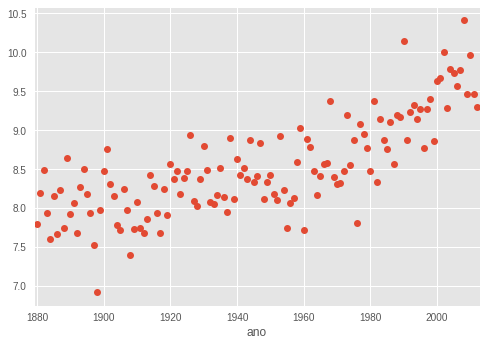

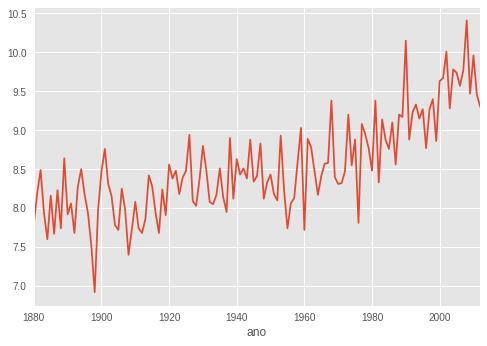

In [79]:
# Gráficos los datos
#ano = df2['ano']
fechas = df2['ano']
temperatura = df2['temp']
#df2 = df.groupby(['Country']).get_group('Argentina')

#df2['year'] = pd.DatetimeIndex(df2['dt']).year

#grouped = df2.groupby(['year']).mean().reset_index()

#ax = sns.tsplot(data=grouped['AverageTemperature'], time=grouped['year'], interpolate=True)
#sns.plt.show()

ax = sns.tsplot(data=temperatura, time=fechas, interpolate=False)
sns.plt.show()

ax = sns.tsplot(data=temperatura, time=fechas, interpolate=True)
sns.plt.show()

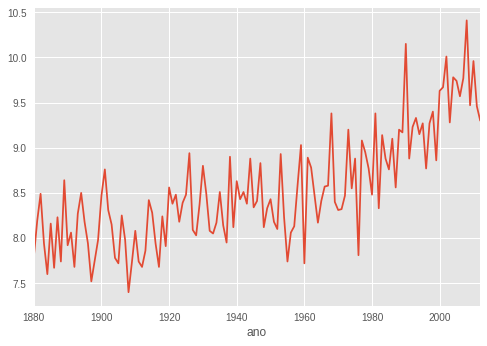

In [248]:
# Limpio los outliers

#fechasSinOutliers = []
#temperaturasSinOutliers = []
#fechasSinOutliers = temperatura[temperatura > 9]

sinOutlier = df2[df2['temp'] > 7]
#print(sinOutlier)
fechasSinOutlier = sinOutlier['ano']
tempSinOutlier = sinOutlier['temp']
#outOutliers = mascara_outlier(df2)
#print(fechasSinOutliers)
#mascara = mascara_outliers(grouped['AverageTemperature'])
#outOutliers = mascara_outliers(temperatura)

#grouped = grouped[mascara]

#sns.tsplot(data=grouped['AverageTemperature'], interpolate=True)

ax = sns.tsplot(data=tempSinOutlier, time=fechasSinOutlier, interpolate=True)
sns.plt.show()

      ano   temp         p
112  1992   9.23  9.445321
113  1993   9.33  9.058312
114  1994   9.15  9.585016
115  1995   9.27  9.064223
116  1996   8.77  9.703745
117  1997   9.27  9.093358
118  1998   9.40  9.797458
119  1999   8.86  9.148802
120  2000   9.63  9.864095
121  2001   9.67  9.231546
122  2002  10.01  9.903755
123  2003   9.28  9.340404
124  2004   9.78  9.918685
125  2005   9.74  9.472113
126  2006   9.57  9.913103
127  2007   9.77  9.621585
128  2008  10.41  9.892859
129  2009   9.47  9.782322
130  2010   9.96  9.864974
131  2011   9.46  9.946926
2.60005240771
Error de predicción: 2.60


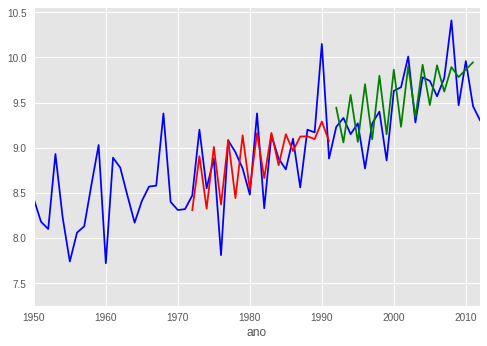

In [386]:
# Uso cuadrados mínimos para predecir
sns.tsplot(data=tempSinOutlier, time=fechasSinOutlier, interpolate=True, color='b')

def armar_matriz_A(s):
    temp = []
    for t in s:
        #temp.append([t^4, t^3, t^2, t, 1, np.sin(t)])
        temp.append([np.sin(3*t + 5), t, 1])
    return np.array(temp)

def entrenar_y_predecir_en_rangos(df, rango_entrenamiento, rango_prediccion):
    regr = linear_model.LinearRegression(fit_intercept=False)

    # Entreno el modelo
    #df_e = df[df['year'].isin(rango_entrenamiento)]
    df_e2 = df2[df2['ano'].isin(rango_entrenamiento)]
    #A_e = armar_matriz_A(df_e['year'])
    A_e2 = armar_matriz_A(df_e2['ano'])
    #regr.fit(A_e, df_e['AverageTemperature'])
    regr.fit(A_e2, df_e2['temp'])
    
    # Me fijo la aproximación que se realizó
    #df_e['p'] = regr.predict(A_e)
    df_e2['p'] = regr.predict(A_e2)
    #sns.tsplot(time=df_e['year'], data=df_e['p'], color='r')
    sns.tsplot(time=df_e2['ano'], data=df_e2['p'], color='r')
    # Realizo predicciones
    #df_p = df[df['year'].isin(rango_prediccion)]
    df_p2 = df2[df2['ano'].isin(rango_prediccion)]
    df_p3 = df_p2
    #s2 = pd.Series([(4,2),(4,2),(4,2)])
    #print(rango_prediccion[-1])
    for i in range(df_p2['ano'].iloc[-1]+1, rango_prediccion[-1]):
        #print(i)  
        dfNew = pd.DataFrame({'ano': [i], 'temp': [0]}, index=[i-1880])
        aConcatenar = [df_p2, dfNew]
        df_p2 = pd.concat(aConcatenar)
    #print(df_p2)
    #A_p = armar_matriz_A(df_p['year'])
    A_p2 = armar_matriz_A(df_p2['ano'])
    #print(A_p2)
    #df_p['p'] = regr.predict(A_p)
    df_p2['p'] = regr.predict(A_p2)
    #sns.tsplot(time=df_p['year'], data=df_p['p'], color='g')
    sns.tsplot(time=df_p2['ano'], data=df_p2['p'], color='g')

    #ECM = sum((df_p['p']-df_p['AverageTemperature'])**2)
    ECM = sum((df_p2['p']-df_p2['temp'])**2)
    print(df_p2)
    print(ECM)
    return ECM

def predecir(k):
    return entrenar_y_predecir_en_rangos(sinOutlier, range(k-20,k), range(k,k+20))
    
ECM = predecir(1992)
print("Error de predicción: {:.2f}".format(ECM))
#ECM = predecir(50)
#print("Error de predicción: {:.2f}".format(ECM))
#ECM = predecir(30)
#print("Error de predicción: {:.2f}".format(ECM))
    
sns.plt.xlim((1950,2050))
sns.plt.xlim((1950,2012))
sns.plt.show()












# Y si no es una seria de tiempo? 

In [12]:
# Un par de cosas más de pandas

years = [2004]*6 + [2005]*6 + [2006]*6
delays = list(np.random.randn(6)+80) + list(np.random.randn(6)+5) + list(np.random.randn(6)+50)
delays[2] = 5
delays[7] = 80

df1 = pd.DataFrame({
    'year': years,
    'delay': delays
})

df1

,delay,year
0,80.821911,2004
1,81.994264,2004
2,5.000000,2004
3,77.742141,2004
4,80.080482,2004
5,80.356484,2004
6,4.082986,2005
7,80.000000,2005
8,5.537343,2005
9,5.836535,2005


In [13]:
# Groupby y sacar outliers

mascara = df1.groupby('year')['delay'].apply(mascara_outliers)
df1 = df1[mascara]
df1

,delay,year
0,80.821911,2004
1,81.994264,2004
3,77.742141,2004
4,80.080482,2004
5,80.356484,2004
6,4.082986,2005
8,5.537343,2005
9,5.836535,2005
10,5.402303,2005
11,5.086106,2005


In [14]:
# Groupby y calcular promedio

promedio = df1.groupby('year').aggregate(['mean', 'std', 'count'])
promedio

delay                
           mean       std count
year                           
2004  80.199056  1.556117     5
2005   5.189055  0.674536     5
2006  50.300613  0.755552     6